In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

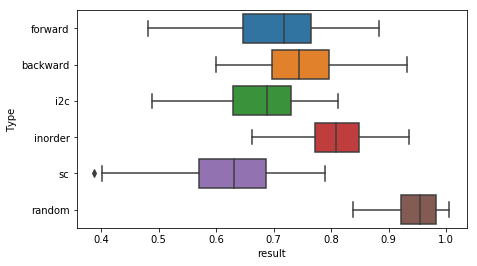

In [12]:
k = 8
gid = 3
with open('./results/graph'+str(gid)+'/'+str(k)+str(gid)+'forward.txt', 'r') as f:
    F = [float(line.strip()) for line in f.readlines()]

with open('./results/graph'+str(gid)+'/'+str(k)+str(gid)+'backward.txt', 'r') as f:
    B = [float(line.strip()) for line in f.readlines()]

with open('./results/graph'+str(gid)+'/'+str(k)+str(gid)+'i2c.txt', 'r') as f:
    I2C = [float(line.strip()) for line in f.readlines()]

with open('./results/graph'+str(gid)+'/'+str(k)+str(gid)+'inorder.txt', 'r') as f:
    I = [float(line.strip()) for line in f.readlines()]

with open('./results/graph'+str(gid)+'/'+str(k)+str(gid)+'random.txt', 'r') as f:
    R = [float(line.strip()) for line in f.readlines()]

with open('./results/graph'+str(gid)+'/'+str(k)+str(gid)+'sc.txt', 'r') as f:
    S = [float(line.strip()) for line in f.readlines()]

df = pd.DataFrame(columns=('Type', 'result'))
cnt = 0
for x in F:
    df.loc[cnt] = ['forward', x]
    cnt += 1
for x in B:
    df.loc[cnt] = ['backward', x]
    cnt += 1
for x in I2C:
    df.loc[cnt] = ['i2c', x]
    cnt += 1
for x in I:
    df.loc[cnt] = ['inorder', x]
    cnt += 1
for x in S:
    df.loc[cnt] = ['sc', x]
    cnt += 1
for x in R:
    df.loc[cnt] = ['random', x]
    cnt += 1
plt.figure(figsize = (7,4))
result = sns.boxplot(y='Type',x='result',data=df)
fig = result.get_figure()
fig.savefig('box.png')